In [1]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns
%matplotlib inline


/tmp/ipykernel_13921/1981552533.py:52: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


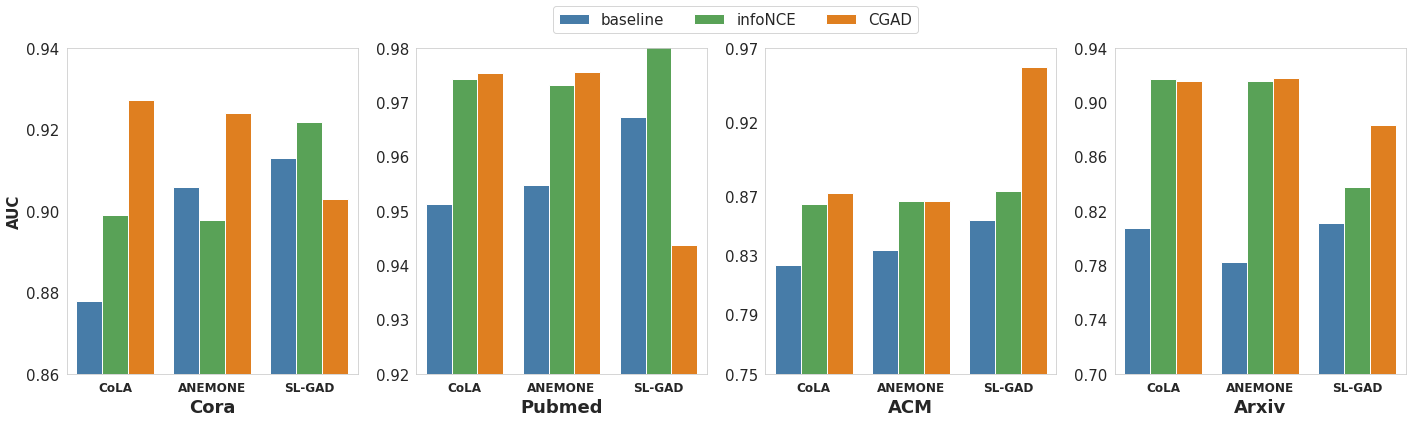

In [103]:
ACM = [82.37, 86.47, 87.20, 83.37, 86.66, 86.66, 85.38, 87.36, 95.70]
Cora = [87.79, 89.90, 92.72, 90.57, 89.77, 92.40, 91.3, 92.17, 90.28]
Pubmed = [95.12, 97.43, 97.54, 95.48, 97.31, 97.55, 96.72, 98.28, 94.37]
Arxiv = [80.73, 91.72, 91.55, 78.19, 91.52, 91.77, 81.06, 83.74, 88.30]

method = ["CoLA"] * 3 + ["ANEMONE"] * 3 + ["SL-GAD"]*3
plug_on = ["baseline", "infoNCE", "CGAD"] * 3
palette = plt.get_cmap('Set1')
data_dict = {
    "ACM":ACM,
    "Cora":Cora,
    "Pubmed":Pubmed,
    "Arxiv":Arxiv
}
yticks_dict = {
   "ACM":[0.75, 0.79,0.83,0.87,0.92, 0.97],
    "Cora":[0.86, 0.88,0.90,0.92,0.94],
    "Pubmed":[0.92, 0.93, 0.94,0.95,0.96,0.97,0.98],
    "Arxiv":[0.70, 0.74,0.78,0.82,0.86, 0.90, 0.94] 
}
def plot_fun(dataset_name='ACM', i=0):
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.subplot(1,4,i+1)
    fontsize = 15
    data = data_dict[dataset_name]
    data_df = pd.DataFrame({
        "data":data,
        "method":method,
        "plug_on":plug_on
    })
    data_df['data'] *= 0.01
    ax = sns.barplot(x="method", y="data", hue="plug_on",data=data_df,\
         palette={plug_on[0]:palette(1), plug_on[1]:palette(2), plug_on[2]:palette(4)})
    ax.set_xticklabels(['CoLA', 'ANEMONE', 'SL-GAD'], fontsize = 12, fontweight='bold')
    ax.set_xlabel(dataset_name, fontsize = int(fontsize*1.2), fontweight='bold')
    plt.yticks(yticks_dict[dataset_name],fontsize=fontsize)
    
    ax.set_ylim(yticks_dict[dataset_name][0], yticks_dict[dataset_name][-1])  # 限定纵轴的范围
    
    if i == 0:
        ax.set_ylabel("AUC", fontsize = fontsize, fontweight='bold')
    else:
        ax.set_ylabel("", fontsize = fontsize, fontweight='bold')
    if i!=3:
        plt.legend([], frameon=False)
    
    
plt.figure(figsize=(24, 6))
for i, k in enumerate(['Cora', "Pubmed", 'ACM', "Arxiv"]):
    plot_fun(k, i)
plt.legend(ncol=3, bbox_to_anchor=(-0.65, 1.15), fontsize=15, loc='best')
plt.tight_layout()

plt.savefig(f"ablation.eps", dpi=400)
plt.show()

In [102]:
# help(sns.barplot)

In [48]:
 help(plt.legend)

Help on function legend in module matplotlib.pyplot:

legend(*args, **kwargs)
    Place a legend on the Axes.
    
    Call signatures::
    
        legend()
        legend(handles, labels)
        legend(handles=handles)
        legend(labels)
    
    The call signatures correspond to the following different ways to use
    this method:
    
    **1. Automatic detection of elements to be shown in the legend**
    
    The elements to be added to the legend are automatically determined,
    when you do not pass in any extra arguments.
    
    In this case, the labels are taken from the artist. You can specify
    them either at artist creation or by calling the
    :meth:`~.Artist.set_label` method on the artist::
    
        ax.plot([1, 2, 3], label='Inline label')
        ax.legend()
    
    or::
    
        line, = ax.plot([1, 2, 3])
        line.set_label('Label via method')
        ax.legend()
    
    Specific lines can be excluded from the automatic legend element
    sele